- https://www.kaggle.com/code/werooring/ch4-data-visualization-distributions

### 4.3 수치형 데이터 시각화

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 4.3.1 히스토그램

<AxesSubplot:xlabel='age', ylabel='Count'>

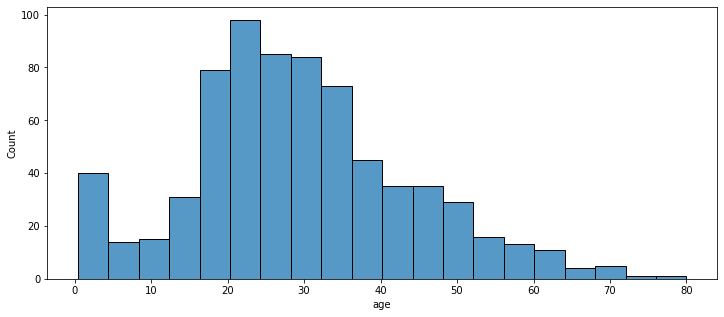

In [4]:
plt.figure(figsize=(12, 5))
sns.histplot(data=titanic, x= 'age')

<AxesSubplot:xlabel='age', ylabel='Count'>

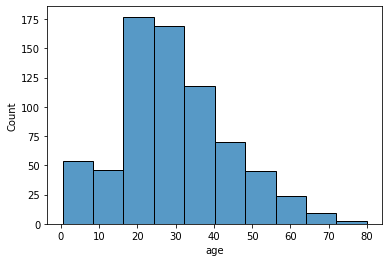

In [5]:
sns.histplot(data=titanic, x = 'age', bins=10)

<AxesSubplot:xlabel='age', ylabel='Count'>

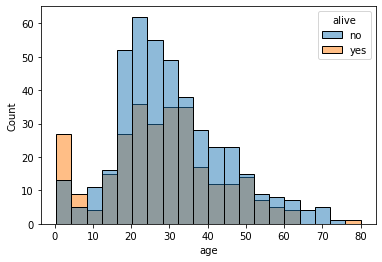

In [6]:
sns.histplot(data=titanic, x='age', hue='alive') #hue : 겹쳐서

<AxesSubplot:xlabel='age', ylabel='Count'>

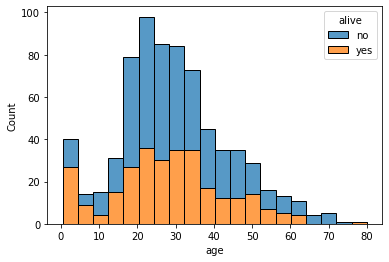

In [7]:
sns.histplot(data=titanic, x='age', hue='alive', multiple='stack') #multiple: 쌓어서

#### 4.3.2 kde plot

<AxesSubplot:xlabel='age', ylabel='Density'>

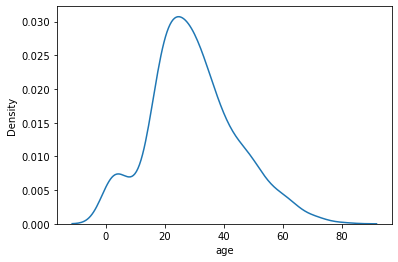

In [8]:
sns.kdeplot(data=titanic, x='age')

<AxesSubplot:xlabel='age', ylabel='Density'>

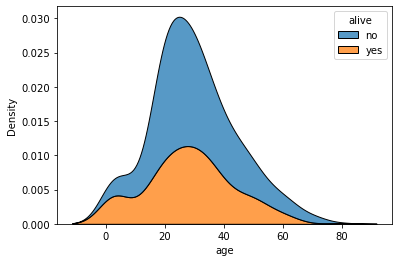

In [9]:
sns.kdeplot(data=titanic, x='age', hue='alive', multiple='stack')

#### 4.3.3 분포도(distplot)

histplot과 kdeplot을 함께 그릴 수 있기 때문에 자주사용

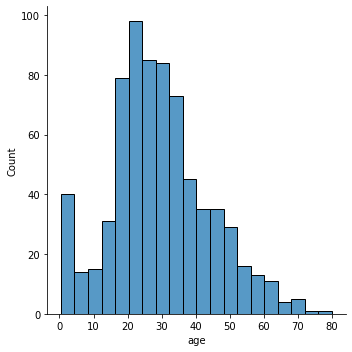

In [10]:
sns.displot(data=titanic, x='age')

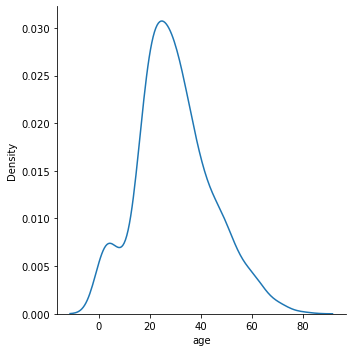

In [11]:
sns.displot(data=titanic, x='age', kind='kde')

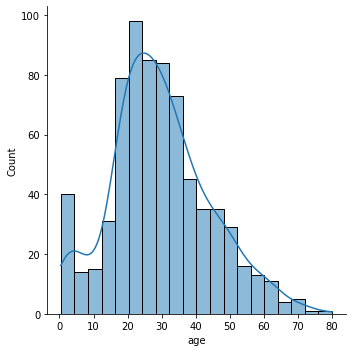

In [12]:
sns.displot(data=titanic, x='age', kde = True)

#### 4.3.4 러그플롯(rugplot)

주변 분포를 나타내는 그래프임. 단독으로 사용하기 보다는 주로 다른 분포도와 함께 사용함

<AxesSubplot:xlabel='age', ylabel='Density'>

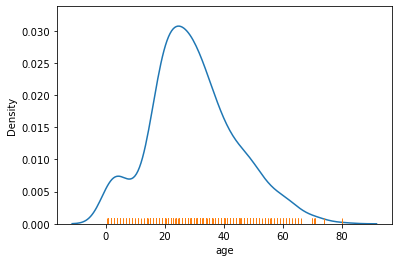

In [13]:
sns.kdeplot(data= titanic, x= 'age')
sns.rugplot(data= titanic, x= 'age')

### 4.4 범주형 데이터 시각화

In [14]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

#### 4.4.1 barplot

<AxesSubplot:xlabel='class', ylabel='fare'>

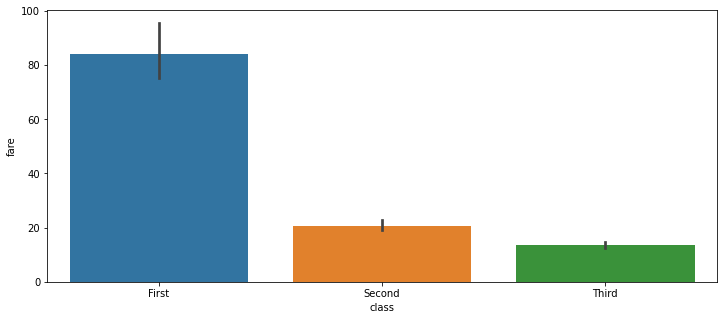

In [15]:
plt.figure(figsize=(12, 5))
sns.barplot(x= 'class', y = 'fare', data=titanic) # 클래스별 fare의 평균

- 상단의 검은 세로줄이 신뢰구간이다.

In [16]:
titanic.groupby('class')['fare'].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

#### 4.4.2 point plot

<AxesSubplot:xlabel='class', ylabel='fare'>

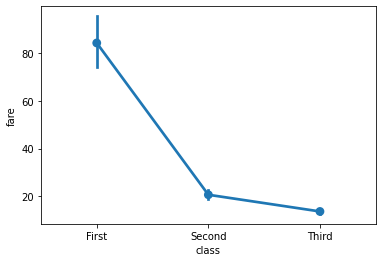

In [17]:
sns.pointplot(x='class', y='fare', data=titanic)

- 한개만 그릴때는 barplot이 유용
- 여러개 그릴때는 pointplot이 유용

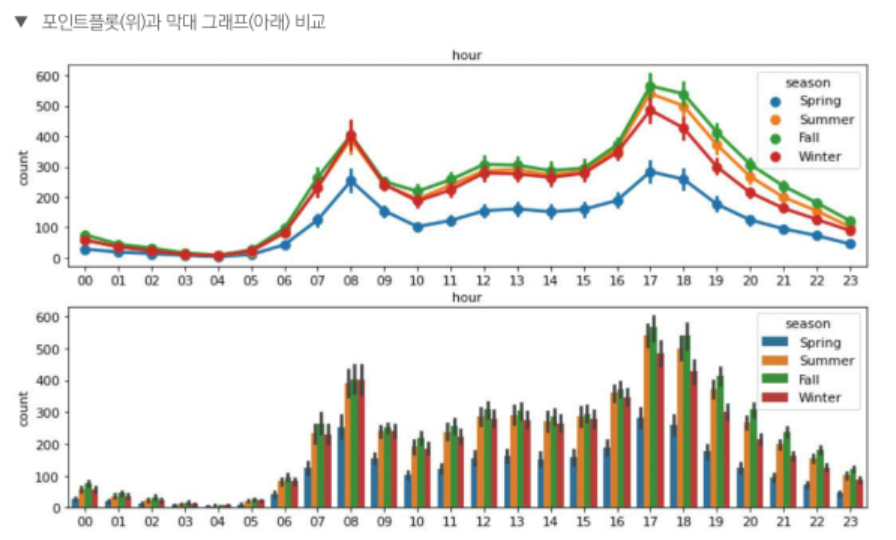

- 위가 더 이쁨

#### 4.4.3 boxplot   
barplot, pointplot 보다 더 많은 구체적인 정보를 제공  
5가지 요약 정보를 제공   
- 제1사분위수(Q1) : 전체 데이터에서 하위 25%  
- 제2사분위수(Q2) : 전체 데이터의 50%(중앙값)
- 제3사분위수(Q3) : 전체 데이터에서 상위 25%  
- 사분위 범위수(IQR) : Q3 - Q1  
- 최댓값 : Q3 + (1.5*IQR)  
- 최댓값 : Q1 - (1.5*IQR)  
- 이상치 : 최댓값보다 큰 값과 최솟값보다 작은 값

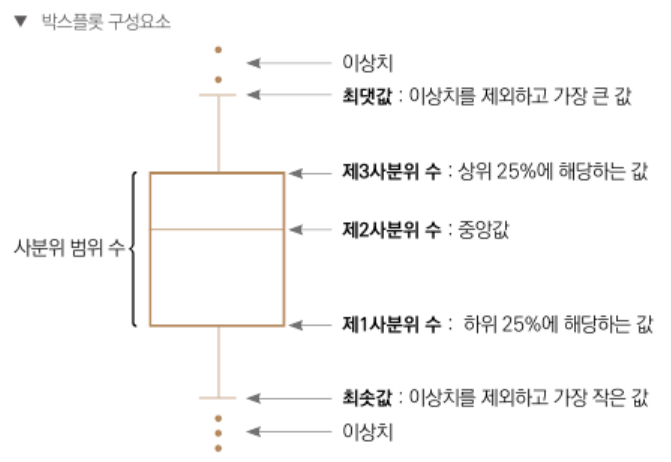

<AxesSubplot:xlabel='class', ylabel='age'>

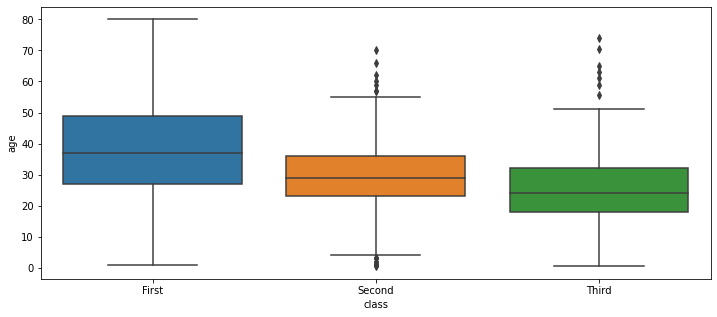

In [20]:
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'class', y='age', data = titanic)

#### 4.4.4 바이올린 플롯

박스풀롯과 커널밀도 함수를 합쳐놓은 함수

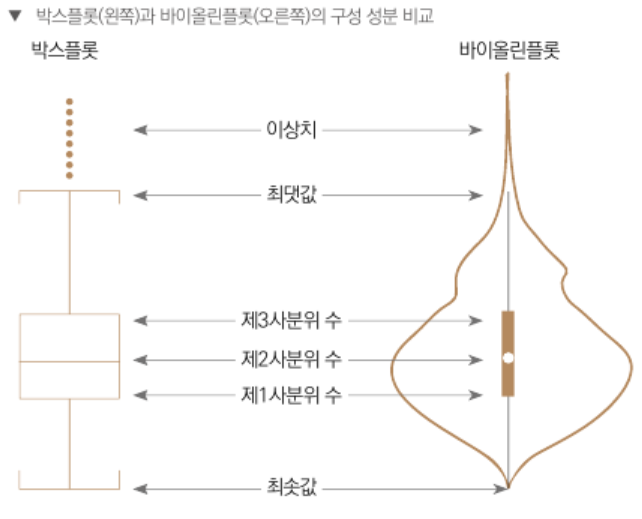

<AxesSubplot:xlabel='class', ylabel='age'>

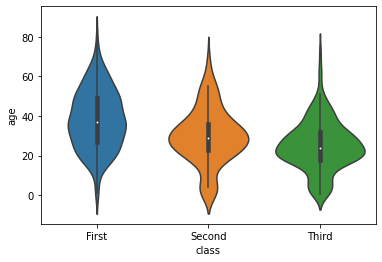

In [21]:
sns.violinplot(data=titanic, x= 'class', y = 'age')

성별에 따른 나이의 등급분포 보기

<AxesSubplot:xlabel='class', ylabel='age'>

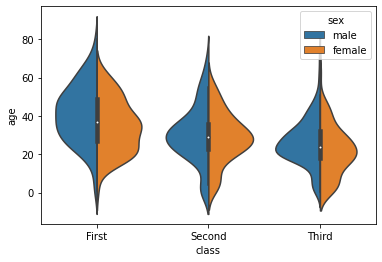

In [22]:
sns.violinplot(x = 'class', y = 'age', hue = 'sex', data=titanic, split=True)

#### 4.4.5 countplot

<AxesSubplot:xlabel='class', ylabel='count'>

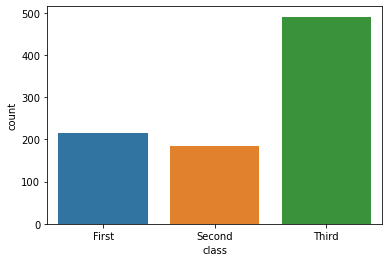

In [23]:
sns.countplot(data=titanic, x = 'class')

<AxesSubplot:xlabel='count', ylabel='class'>

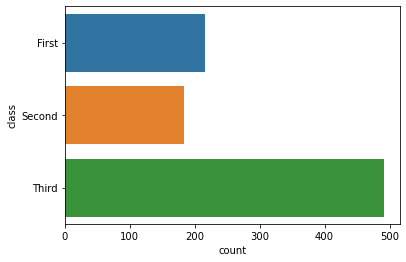

In [24]:
sns.countplot(data=titanic, y = 'class')

barplot vs countplot   
- barplot : 범주형 데이터 별 수치형 데이터의 평균을 구해줌(따라서 피처 두개 필요)
- countplot : 피처 하나만 받음

<AxesSubplot:xlabel='class', ylabel='fare'>

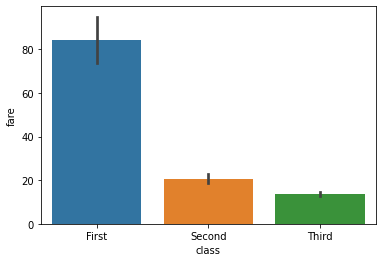

In [26]:
sns.barplot(x= 'class', y='fare', data = titanic)

<AxesSubplot:xlabel='class', ylabel='count'>

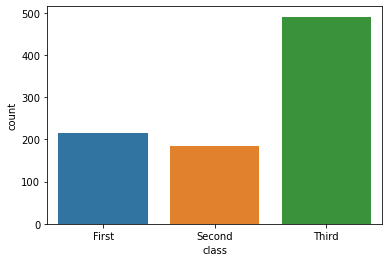

In [27]:
sns.countplot(x='class', data=titanic)

barplot으로는 평균이 아닌, 중앙값, 최대값 최소값 구할 수 있음

In [29]:
import numpy as np

<AxesSubplot:xlabel='class', ylabel='fare'>

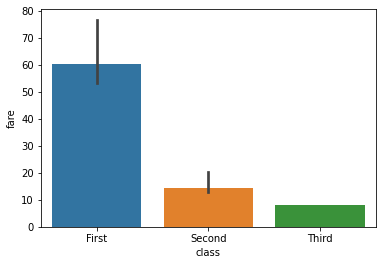

In [31]:
sns.barplot(x= 'class', y='fare', data = titanic, estimator=np.median)
#sns.barplot(x= 'class', y='fare', data = titanic, estimator=np.max)
#sns.barplot(x= 'class', y='fare', data = titanic, estimator=np.min)

#### 4.4.6 파이 그래프

### 4.5 데이터 관계 시각화

히트맵, 라인플롯, 회귀선

In [32]:
import seaborn as sns

flights = sns.load_dataset('flights')

#### 4.5.1 히트맵

In [33]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [34]:
flights_pivot = flights.pivot(index = 'month', columns='year', values='passengers')

In [35]:
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

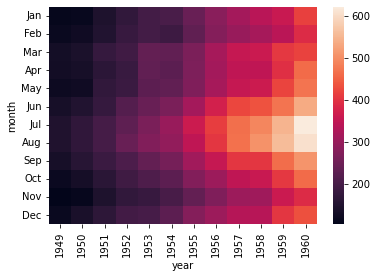

In [36]:
sns.heatmap(data = flights_pivot)

#### 4.5.2 lineplot

<AxesSubplot:xlabel='year', ylabel='passengers'>

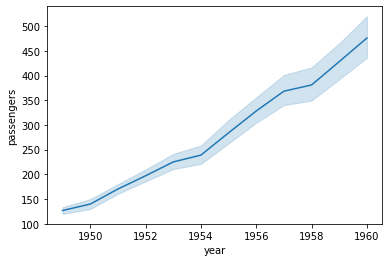

In [37]:
sns.lineplot(x = 'year', y = 'passengers', data = flights)

- 평균과 95% 신뢰 구간이 표시됨

#### 4.5.3 scatterplot

In [38]:
tips = sns.load_dataset('tips')

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

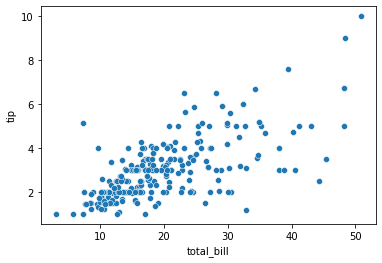

In [40]:
sns.scatterplot(x= 'total_bill', y = 'tip', data = tips)

- 총액이 늘어나면 팁도 늘어남

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

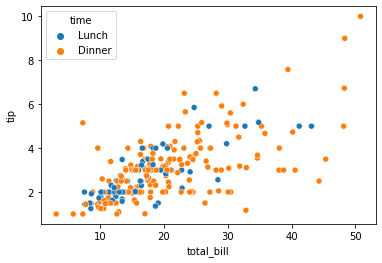

In [41]:
sns.scatterplot(data=tips, x = 'total_bill', y = 'tip', hue='time')

#### 4.5.4 회귀선을 포함하는 산점도 그래프 : regplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

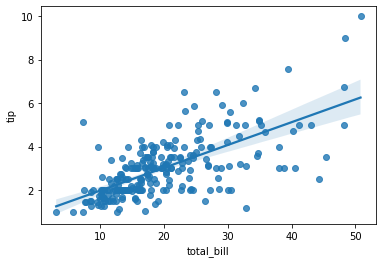

In [43]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

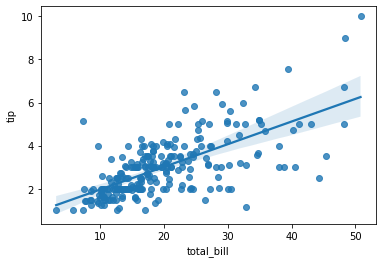

In [45]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips, ci = 99) # 신뢰구간 99%